# How to Format Data

Scikit-learn is a great library for creating machine learning models from data. Before you can fit a model using scikit-learn, your data has to be in a recognizable format. Scikit-learn works well with numeric data that is stored in numpy arrays. Additionally, you can convert your data from objects like pandas dataframes to numpy arrays. In this video, I'll show you how you make your data a more acceptable input for scikit-learn. 

## Features Matrix and Target Vector

The first thing you have to understand is what Scikit-Learn expects for Features Matrices and target vectors. In scikit-learn, a features matrix is a two-dimensional grid of data where rows represent samples and columns represent features. A target vector is usually one dimensional and in the case of supervised learning, what you want to predict from the data. 

![images](images/featuresMatrixTargetVector.png)

Let's see an example of this. the image is a pandas dataframe of the first 5 rows of the iris dataset. A single flower represent one row of the dataset and the flower measurements are the columns. In this dataset, the species column is what you are trying to predict. 

![images](images/irisFeatureTarget.png)

Let's now go over how to make sure your data is in an acceptable format

## Import Libraries

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [11]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Arrange Data into Features Matrix and Target Vector

In [3]:
feature_names = ['sepal length (cm)',
                 'sepal width (cm)',
                 'petal length (cm)',
                 'petal width (cm)']

In [4]:
# Multiple column features matrix to convert to NumPy Array
df.loc[:, feature_names]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# Convert to numpy array
x = df.loc[:, feature_names].values

In [6]:
# Make sure NumPy array is two dimensional
x.shape

(150, 4)

In [7]:
# Pandas series to convert to NumPy Array
df.loc[:, 'species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [8]:
y = df.loc[:, 'species'].values

In [9]:
y.shape

(150,)

So that's it, scikit-learn expects data in a particular format. 

How do you create a complex model using scikit-learn? An easy solution is to start with a simple model like linear regression and go from there.

![image](images/linearregression.png)

In this video, I'll show you can create a linear regression model using Scikit-Learn so that more complex models will be easier to create



In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the Dataset
The dataset that is loaded below is a dataset which is designed to show that Scikit-Learn requires data to be free of missing values. If you don't remove or impute your missing values, you will get an error. The goal of this dataset is to use the feature column x to predict the target column y. 

In [11]:
df = pd.read_csv("data/linear.csv")
df.head()

,x,y
0,0.000000,-51.000000
1,25.000000,-12.000000
2,117.583220,134.907414
3,108.922466,134.085180
4,69.887445,NaN


##  Remove Missing or Impute Values
If you want to build models with your data, null values are (almost) never allowed. It is important to always see how many samples have missing values and for which columns.

In [12]:
# Look at the shape of the dataframe
df.shape

(102, 2)

In [13]:
# There are missing values in the y column which is what we will predict 
df.isnull().sum()

x    0
y    8
dtype: int64

You can either remove rows where there is a missing value or you can fill in missing values. The option used in this notebook is to remove rows with missing values. 

In [14]:
# Remove entire rows from dataframe if they contain any nans in them or 'all'
# this may not be the best strategy for our dataset
df = df.dropna(how = 'any')

In [15]:
# There are no more missing values
df.isnull().sum()

x    0
y    0
dtype: int64

In [16]:
df.shape

(94, 2)

You could have filled in missing values using the `fillna` method on a pandas series if you want

## Arrange Data into Features Matrix and Target Vector

In [17]:
# Convert x column to numpy array
X = df.loc[:, ['x']].values

In [18]:
# Features Matrix needs to be at 2 dimensional
X.shape

(94, 1)

In [19]:
y = df.loc[:, 'y'].values

In [20]:
y.shape

(94,)

## Linear Regression

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [21]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.linear_model import LinearRegression

<b>Step 2:</b> Make an instance of the Model

This is a place where you can tune the hyperparameters of a model. In the case of linear regression, you can set `fit_intercept` to True or False depending on your needs. This is an important concept as more complex models have a lot more you can tune. 

![images](images/regInterceptTrueFalse.png)

In [22]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

In [23]:
# If you want to see what you can tune for a model, you can use the help function
#help(LinearRegression)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x and y

In [24]:
reg.fit(X,y)

LinearRegression()

<b>Step 4:</b> Predict the values of new data. Uses the information the model learned during the model training process

Predict for One Observation

In [25]:
# Input needs to be two dimensional (reshape makes input two dimensional )
reg.predict(X[0].reshape(-1,1))

array([-50.99119328])

Predict for Multiple Observations at Once

In [26]:
reg.predict(X[0:10])

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

## Measuring Model Performance

Unlike classification models where a common metric is accuracy, regression models use other metrics like R^2, the coefficient of determination to quantify your model's performance. The best possible score is 1.0. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [27]:
score = reg.score(X, y)
print(score)

0.979881836115762


## What is the equation of the line for the regression?

After you fit an instance of a model in scikit-learn, you can use additional attributes. 

In [28]:
reg.coef_

array([1.58368564])

In [29]:
reg.intercept_

-50.99119328333397

In [30]:
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

formula: y = 1.58x + -50.99


## Plotting the Best Fit Linear Regression Line in Red

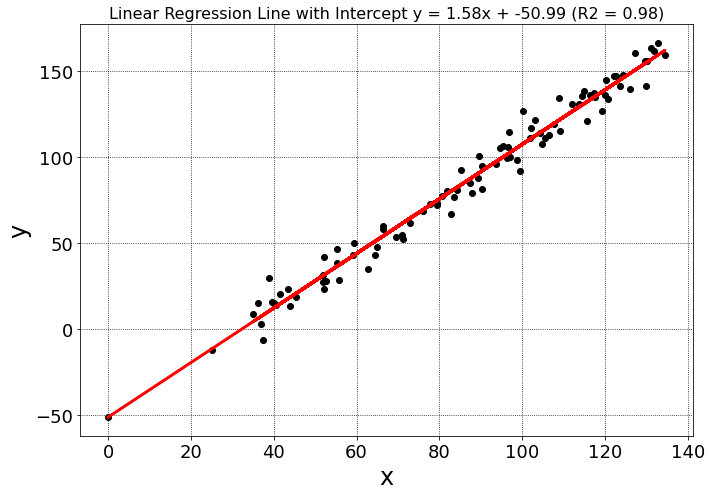

In [31]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize = 24)
ax.set_ylabel('y', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

### Plotting Models With or Without Intercept
In this section, you will see how changing a hyperparameter value can have a drastic impact on the R2 

In [32]:
# Model with Intercept (like earlier in notebook)
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

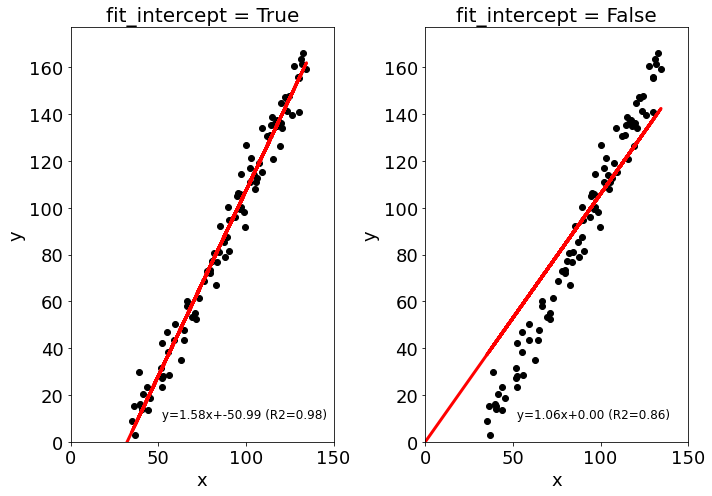

In [33]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    ax[index].set_xlim(left = 0, right = 150)
    ax[index].set_ylim(bottom = 0)
    
    ax[index].text(50, 10, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()

So that's it, I encourage you to create a linear regression model using scikit-learn so you can have a better understanding how scikit-learn works. 

<hr><font color="green"><h1>from file: 02_04_Train_Test_Split</h1></font>

A goal of supervised learning is to build a model that performs well on new data. If you have new data, you could see how your model performs on it. The problem is that you may not have new data, but you can simulate this experience with a train test split. In this video, I'll show you how train test split works in Scikit-Learn.

## What is `train_test_split`

1. Split the dataset into two pieces: a **training set** and a **testing set**. Typically, about 75% of the data goes to your training set and 25% goes to your test set. 
2. Train the model on the **training set**.
3. Test the model on the **testing set** and evaluate the performance 



## Import Libraries

In [34]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

## Load the Dataset
The boston house-price dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the boston dataset.

In [35]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
X = df.loc[:, ['RM', 'LSTAT', 'PTRATIO']].values

In [37]:
y = df.loc[:, 'target'].values

## Train Test Split 

![images](images/trainTestSplitBoston.png)
The colors in the image indicate which variable (X_train, X_test, y_train, y_test) the data from the dataframe df went to for a particular train test split (not necessarily the exact split of the code below).

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

## Linear Regression Model

In [39]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

LinearRegression()

## Measuring Model Performance
By measuring model performance on the test set, you can estimate how well your model is likely to perform on new data (out-of-sample data)

In [40]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

0.7155620757319657


So that's it, train_test_split helps you simulate how well a model would perform on new data